In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
motor_df = pd.read_csv('Resources/Motor_Vehicle_Crashes_-_Vehicle_Information__Three_Year_Window.csv')
motor_df.head()

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2018,15232120,VAN TRUCK,AGRICULTURAL TRUCK,Parked,Not Entered,North,Gas,2015.0,NY,0.0,4.0,NISSA,HUMAN,Not Entered,HUMAN,Not Entered,Not Entered,3N6CM0KN2FK713460
1,2018,15232535,SUBURBAN,PASSENGER OR SUBURBAN,Making U Turn,Not Entered,South,Gas,2015.0,NY,1.0,6.0,HONDA,HUMAN,Not Entered,HUMAN,Unknown,Not Entered,5J6TF2H55FL001556
2,2018,15232536,SEDAN,Not Entered,Going Straight Ahead,Not Entered,North,Not Entered,NaN,PA,1.0,NaN,NaN,HUMAN,Not Entered,HUMAN,Unknown,Not Entered,NaN
3,2018,15232557,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Parked,Not Entered,South,Gas,2013.0,NY,5.0,4.0,NISSA,HUMAN,Passenger Distraction,VEHICLE,Other*,Not Entered,1N4AL3AP8DC229156
4,2018,15232556,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,South,Gas,2009.0,NY,2.0,8.0,CADIL,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Entered,3GYFK22209G213337


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
motor_df = motor_df.drop(['Case Vehicle ID', 'Partial VIN'], axis=1)

In [28]:
motor_df = motor_df.dropna()

In [29]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
motor_df.nunique()

Year                                    2
Vehicle_Body_Type                      51
Registration_Class                     64
Action_Prior_to_Accident               21
Truck_or_Bus                            5
Direction_of_Travel                    10
Fuel_Type                               9
Vehicle_Year                           95
State_of_Registration                  15
Number_of_Occupants                    64
Engine_Cylinders                       14
Vehicle_Make                         1212
Contributing Factor 1                   3
Contributing_Factor_1_Description      58
Contributing_Factor_2                   3
Contributing Factor 2 Description      57
Event_Type                             34
dtype: int64

In [30]:
# Remanme Columns in the dataframe
motor_df.rename(columns={'Vehicle Body Type': 'Vehicle_Body_Type', 'Registration Class': 'Registration_Class',
                         'Action Prior to Accident' : 'Action_Prior_to_Accident', 
                         'Type / Axles of Truck or Bus':'Truck_or_Bus',
                         'Direction of Travel' : 'Direction_of_Travel', 'Fuel Type': 'Fuel_Type',
                         'Vehicle Year': 'Vehicle_Year', 'State of Registration': 'State_of_Registration',
                         'Number of Occupants':'Number_of_Occupants', 'Engine Cylinders': 'Engine_Cylinders',
                         'Vehicle Make': 'Vehicle_Make', 'Contributing Factor 1 ': 'Contributing_Factor_1',
                         'Contributing Factor 1 Description': 'Contributing_Factor_1_Description',
                         'Contributing Factor 2': 'Contributing_Factor_2', 'Event Type': 'Event_Type'}, inplace=True)

In [39]:
# Look at Vehoicle_Make value counts for binning
#  YOUR CODE GOES HERE
motor_count = motor_df['Vehicle_Make'].value_counts()
motor_count.head(30)

TOYOT    177391
HONDA    147435
FORD     123621
CHEVR    121472
NISSA    110520
JEEP      60810
HYUND     54558
DODGE     44049
SUBAR     39699
BMW       27585
KIA       27095
ME/BE     26789
GMC       23576
VOLKS     22319
CHRYS     20810
LEXUS     20190
ACURA     19501
MAZDA     17837
INFIN     15117
BUICK     12566
RAM       12515
AUDI      12384
CADIL     10037
MITSU      9668
LINCO      9169
VOLVO      7204
PONTI      7189
FREIG      5499
MERCU      5303
SATUR      4883
Name: Vehicle_Make, dtype: int64

<AxesSubplot:ylabel='Density'>

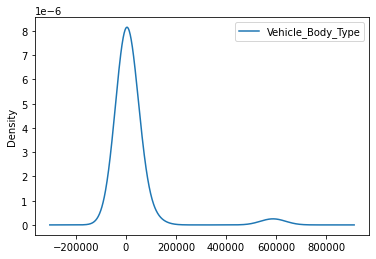

In [16]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
motor_count.plot.density()

In [43]:
# Determine which values to replace if counts are less than ...?

replace_Vehicle = list(motor_count[motor_count < 20000].index)
replace_Vehicle
# Replace in dataframe
for car in replace_Vehicle:
    motor_df.Vehicle_Make = motor_df.Vehicle_Make.replace(car,"Other")
    
# Check to make sure binning was successful
motor_df.Vehicle_Make.value_counts()

Other    204731
TOYOT    177391
HONDA    147435
FORD     123621
CHEVR    121472
NISSA    110520
JEEP      60810
HYUND     54558
DODGE     44049
SUBAR     39699
BMW       27585
KIA       27095
ME/BE     26789
GMC       23576
VOLKS     22319
CHRYS     20810
LEXUS     20190
Name: Vehicle_Make, dtype: int64

In [46]:
# Look at Vehicle_Year value counts for binning
#  YOUR CODE GOES HERE
year_count = motor_df['State_of_Registration'].value_counts()
year_count.head(30)

NY    1252625
PA          5
OK          5
NJ          3
MD          2
WI          1
TX          1
NH          1
GA          1
OH          1
NM          1
DC          1
NC          1
MI          1
IL          1
Name: State_of_Registration, dtype: int64

In [48]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_registration = list(year_count[year_count < 100].index)

# Replace in dataframe
for reg in replace_registration:
    motor_df.State_of_Registration = motor_df.State_of_Registration.replace(reg,"Other")
    
# Check to make sure binning was successful
motor_df.State_of_Registration.value_counts()

NY       1252625
Other         25
Name: State_of_Registration, dtype: int64

In [51]:
# Look at Regristration Class value counts for binning
#  YOUR CODE GOES HERE
class_count = motor_df['Registration_Class'].value_counts()
class_count.head(30)

PASSENGER OR SUBURBAN               1042705
OMNIBUS - TAXI                        67053
AGRICULTURAL TRUCK                    39954
COMMERCIAL                            22949
SPECIAL PASSENGER                     18913
POLITICAL SUBDIVISION                 15557
MOTORCYCLE                             7450
ORGANIZATIONAL                         5494
INTERNATIONAL REGISTRATION             5484
OMNIBUS - REGULAR                      5215
OMNIBUS - LIVERY                       4664
OMNIBUS-SPECIAL (PRIVATE RENTAL)       2244
SCHOOL CAR                             2010
TOW TRUCK                              1637
TRACTOR - REGULAR                      1614
SPORTS                                 1527
AMBULANCE                              1223
STATE                                  1177
REGIONAL                               1166
MEDICAL DOCTOR                         1090
SEMI-TRAILER                            780
AGRICULTURAL COMMERCIAL                 485
SPECIAL PURPOSE COMMERCIAL      

In [53]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_class = list(class_count[class_count < 4000].index)

# Replace in dataframe
for Class in replace_class:
    motor_df.Registration_Class = motor_df.Registration_Class.replace(Class,"Other")
    
# Check to make sure binning was successful
motor_df.Registration_Class.value_counts()

PASSENGER OR SUBURBAN         1042705
OMNIBUS - TAXI                  67053
AGRICULTURAL TRUCK              39954
COMMERCIAL                      22949
SPECIAL PASSENGER               18913
Other                           17212
POLITICAL SUBDIVISION           15557
MOTORCYCLE                       7450
ORGANIZATIONAL                   5494
INTERNATIONAL REGISTRATION       5484
OMNIBUS - REGULAR                5215
OMNIBUS - LIVERY                 4664
Name: Registration_Class, dtype: int64

In [54]:
# Generate our categorical variable lists
motor_cat = motor_df.dtypes[motor_df.dtypes == "object"].index.tolist()
motor_cat

['Vehicle_Body_Type',
 'Registration_Class',
 'Action_Prior_to_Accident',
 'Truck_or_Bus',
 'Direction_of_Travel',
 'Fuel_Type',
 'State_of_Registration',
 'Vehicle_Make',
 'Contributing Factor 1',
 'Contributing_Factor_1_Description',
 'Contributing_Factor_2',
 'Contributing Factor 2 Description',
 'Event_Type']

In [55]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list

encode_df = pd.DataFrame(enc.fit_transform(motor_df[motor_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(motor_cat)
encode_df.head()

,Vehicle_Body_Type_2 DOOR SEDAN,Vehicle_Body_Type_4 DOOR SEDAN,Vehicle_Body_Type_ALL TERRAIN VEHICLE,Vehicle_Body_Type_AMBULANCE,Vehicle_Body_Type_BUS (OMNIBUS),Vehicle_Body_Type_CEMENT MIXER,Vehicle_Body_Type_CONSTRUCTION EQUIPMENT,Vehicle_Body_Type_CONVERTIBLE,Vehicle_Body_Type_CUSTOM,Vehicle_Body_Type_DELIVERY TRUCK,...,"Event_Type_Other*, Non-Collision","Event_Type_Overturned, Non-Collision","Event_Type_Pedestrian, Collision With","Event_Type_Railroad Train, Collision With","Event_Type_Ran Off Roadway Only, Non-Collision","Event_Type_Sign Post, Collision With Fixed Object","Event_Type_Snow Embankment, Collision With Fixed Object","Event_Type_Submersion, Non-Collision","Event_Type_Tree, Collision With Fixed Object",Event_Type_Unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
